In [5]:
import os
import re
import pandas as pd

# Path to the specific CSV file
file_path = './comments/Wiz Khalifa - See You Again ft. Charlie Puth [Official Video] Furious 7 Soundtrack.csv'

# Compile the emoji detection pattern
emoji_pattern = re.compile(
    "[\U0001F600-\U0001F64F"  # Emoticons
    "\U0001F300-\U0001F5FF"  # Symbols & Pictographs
    "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
    "\U0001F1E0-\U0001F1FF"  # Flags (iOS)
    "\U00002702-\U000027B0"  # Miscellaneous Symbols
    "\U000024C2-\U0001F251"  # Enclosed characters
    "]+", flags=re.UNICODE
)

# Process the specific file
try:
    # Use on_bad_lines='skip' to skip malformed rows
    df = pd.read_csv(file_path, on_bad_lines='skip', encoding='utf-8', engine='python')
    df['video'] = os.path.basename(file_path)  # Add a column to identify the source file
    df['contains_emoji'] = df['comment'].str.contains(emoji_pattern, na=False)  # Identify rows with emojis
    print(f"Total records in the file: {df.shape[0]}")
    print(f"Records with emojis: {df['contains_emoji'].sum()}")
    
    # Display the first few rows for verification
    print(df.head())
except Exception as e:
    print(f"Error processing file {file_path}: {e}")


Total records in the file: 49999
Records with emojis: 23948
                    user_id               username                    comment  \
0  UCbHoyu9bh7qzXvNt7gsFH3w          @Sanjuyt07404  This song soul connection   
1  UC_jngjytB6Tgf8EsIXWowQg          @vaibhavhere1   October audience Here' ❤   
2  UCnbsnIqKvYAb79sb7hOahXA               @迫廷陈-d4y                   for Paul   
3  UC30mxFbKA9biUPVbBny0Inw     @Someadviceshitt21           November 2046..🎉   
4  UCnmGslGAswpjqb3gIqn9yEw  @anasofiamedeiros1760            Liam Payne!🤍🥹🇧🇷   

   likes  replies                  date  \
0      0        0  2024-10-20T15:49:25Z   
1      0        0  2024-10-20T15:24:49Z   
2      0        0  2024-10-20T15:24:31Z   
3      1        0  2024-10-20T14:52:58Z   
4      0        1  2024-10-20T14:51:40Z   

                                               video  contains_emoji  
0  Wiz Khalifa - See You Again ft. Charlie Puth [...           False  
1  Wiz Khalifa - See You Again ft. Charlie Puth [...

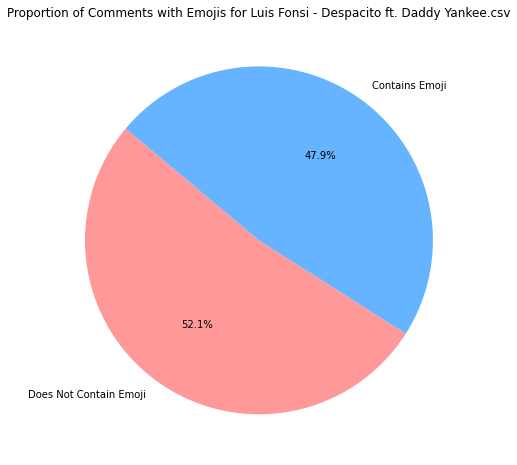

In [6]:
import matplotlib.pyplot as plt
# Count rows with and without emojis
emoji_counts = df['contains_emoji'].value_counts()
labels = ['Does Not Contain Emoji','Contains Emoji']

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(emoji_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Proportion of Comments with Emojis for Luis Fonsi - Despacito ft. Daddy Yankee.csv')
plt.show()

In [7]:
def count_emojis(text):
    return len(emoji_pattern.findall(text))
data_emoji = df[df['contains_emoji'] == True]
data_emoji['emoji_count'] = data_emoji['comment'].apply(count_emojis)
data_filtered = data_emoji[(data_emoji['emoji_count'] <= 4) & (data_emoji['comment'].str.len() <= 100)]
data_filtered

<ipython-input-7-9dc44fd67257>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_emoji['emoji_count'] = data_emoji['comment'].apply(count_emojis)


,user_id,username,comment,likes,replies,date,video,contains_emoji,emoji_count
1,UC_jngjytB6Tgf8EsIXWowQg,@vaibhavhere1,October audience Here' ❤,0,0,2024-10-20T15:24:49Z,Wiz Khalifa - See You Again ft. Charlie Puth [...,True,1
3,UC30mxFbKA9biUPVbBny0Inw,@Someadviceshitt21,November 2046..🎉,1,0,2024-10-20T14:52:58Z,Wiz Khalifa - See You Again ft. Charlie Puth [...,True,1
4,UCnmGslGAswpjqb3gIqn9yEw,@anasofiamedeiros1760,Liam Payne!🤍🥹🇧🇷,0,1,2024-10-20T14:51:40Z,Wiz Khalifa - See You Again ft. Charlie Puth [...,True,1
5,UCL5zusRWclSVpS5qfsqSVlQ,@betsi-o9x,Ilove this music ❤❤❤❤❤,0,0,2024-10-20T14:47:48Z,Wiz Khalifa - See You Again ft. Charlie Puth [...,True,1
9,UCXuUyNLzCeL5i32Yx3vWKqA,@GudduKumar-xt9kr,20/10/2024❤❤,0,0,2024-10-20T14:29:06Z,Wiz Khalifa - See You Again ft. Charlie Puth [...,True,1
...,...,...,...,...,...,...,...,...,...
49993,UC6VdHqxnK0nB84G_fdxW5wQ,@jagadishlama3700,Evergreen ❤️ Rip legend,0,0,2024-02-01T11:24:55Z,Wiz Khalifa - See You Again ft. Charlie Puth [...,True,1
49994,UCOUdAlJOD9qLpp-B8Nv8e0g,@leakhenapek7260,❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤,0,0,2024-02-01T11:16:38Z,Wiz Khalifa - See You Again ft. Charlie Puth [...,True,1
49995,UCfA4qTorPqBVd7rVXBWI_dg,@rohitlimbu1394,One of my favourite ❤❤❤❤❤❤❤❤ it man,0,1,2024-02-01T11:10:22Z,Wiz Khalifa - See You Again ft. Charlie Puth [...,True,1
49996,UCe_lcd2Wb-mc3Joc5OLZvLQ,@jeremiematondo6140,😢😭,0,0,2024-02-01T10:54:41Z,Wiz Khalifa - See You Again ft. Charlie Puth [...,True,1


In [ ]:
import os
from deep_translator import GoogleTranslator
from langdetect import detect
import pandas as pd
import re
def extract_emojis(text):
    """Extract all emojis from a given text."""
    return ''.join(emoji_pattern.findall(text))

# Define the function to translate text
def translate_to_english(row):
    try:
        text = row['comment']
        row_number = row.name + 1  # Get the row number (1-indexed)
        
        # Extract emojis
        emojis = extract_emojis(text)
        
        # Remove emojis before translation
        text_without_emojis = emoji_pattern.sub('', text).strip()
        
        # Handle emoji-only text or empty text
        if not text_without_emojis:
            print(f"Row {row_number}: Text contains only emojis or is empty: {text}")
            return text  # Return original text if no translatable content
        
        # Detect language
        detected_language = detect(text_without_emojis)
        print(f"Row {row_number}: Detected language: {detected_language}")

        # Translate if necessary
        if detected_language != 'en':
            translation = GoogleTranslator(target='en').translate(text_without_emojis)
        else:
            translation = text_without_emojis  # Keep the original if it's English

        # Append emojis to the translated text
        translated_with_emojis = f"{translation} {emojis}".strip()
        
        print(f"Row {row_number}: Original: {text}, Translated: {translated_with_emojis}")
        return translated_with_emojis
    except Exception as e:
        print(f"Row {row_number}: Error translating text: {text}, Error: {e}")
        return text
output_folder = './translated_comments_folder2'
os.makedirs(output_folder, exist_ok=True)
output_file = os.path.join(output_folder, 'Wiz Khalifa - See You Again ft. Charlie Puth [Official Video] Furious 7 Soundtrack.csv')

# Process each row and save results
with open(output_file, 'a', encoding='utf-8') as f:
    # Write header if the file is empty
    if os.path.getsize(output_file) == 0:
        f.write("row_number,original_comment,translated_comment\n")
    
    # Apply the translation function row by row
    for _, row in data_emoji.iterrows():
        row_number = row.name + 1
        original_comment = row['comment']
        translated_comment = translate_to_english(row)
        
        # Append the row to the CSV
        f.write(f"{row_number},{original_comment},{translated_comment}\n")
        print(f"Row {row_number} saved.")

Row 2: Detected language: en
Row 2: Original: October audience Here' ❤, Translated: October audience Here' ❤
Row 2 saved.
Row 4: Detected language: no
Row 4: Original: November 2046..🎉, Translated: November 2046.. 🎉
Row 4 saved.
Row 5: Detected language: lt
Row 5: Original: Liam Payne!🤍🥹🇧🇷, Translated: Liam Payne!🤍🥹 🇧🇷
Row 5 saved.
Row 6: Detected language: en
Row 6: Original: Ilove  this  music ❤❤❤❤❤, Translated: Ilove  this  music ❤❤❤❤❤
Row 6 saved.
Row 10: Error translating text: 20/10/2024❤❤, Error: No features in text.
Row 10 saved.
Row 12: Detected language: en
Row 12: Original: iLove dis  song❤, Translated: iLove dis  song ❤
Row 12 saved.
Row 14: Detected language: en
Row 14: Original: When I heard this song, I was moved to tears😢, Translated: When I heard this song, I was moved to tears 😢
Row 14 saved.
Row 15: Detected language: tl
Row 15: Original: Today anyone❤, Translated: Today anyone ❤
Row 15 saved.
Row 16: Detected language: en
Row 16: Original: Dedicating this beautiful 

Row 55: Original: Rip Liam Payne❤, Translated: Rip Liam Payne ❤
Row 55 saved.
Row 56: Detected language: en
Row 56: Original: Perfect ❤❤, Translated: Perfect ❤❤
Row 56 saved.
Row 59: Detected language: en
Row 59: Original: James you will be remembered ❤, Translated: James you will be remembered ❤
Row 59 saved.
Row 62: Detected language: en
Row 62: Original: 😅😊😊😊😅😅 wow is it real, Translated: wow is it real 😅😊😊😊😅😅
Row 62 saved.
Row 63: Detected language: en
Row 63: Original: Miss poul wallker😢, Translated: Miss poul wallker 😢
Row 63 saved.
Row 64: Detected language: en
Row 64: Original: Space for the one's who want continue to feel this song in 2025.  👇👇 ❤❤❤❤❤, Translated: Space for the one's who want continue to feel this song in 2025. 👇👇❤❤❤❤❤
Row 64 saved.
Row 65: Detected language: en
Row 65: Original: This song like us my friend last ride 😢, Translated: This song like us my friend last ride 😢
Row 65 saved.
Row 66: Detected language: en
Row 66: Original: So sad this dong 😢😢😢😭😭😭😭😭, Tr

Row 154: Original: Stefan Hilpert 😊🎉❤, Translated: Stefan Hilpert 😊🎉❤
Row 154 saved.
Row 157: Detected language: en
Row 157: Original: This played ay my brothers funeral in February  2017. ❤, Translated: This played ay my brothers funeral in February  2017. ❤
Row 157 saved.
Row 161: Detected language: en
Row 161: Original: Oct 19/2024💔, Translated: Oct 19/2024 💔
Row 161 saved.
Row 162: Detected language: pt
Row 162: Original: Outubro de 2024 ❤, Translated: October 2024 ❤
Row 162 saved.
Row 165: Detected language: ru
Row 165: Original: Россия 👍👍👍, Translated: Russia 👍👍👍
Row 165 saved.
Row 167: Text contains only emojis or is empty: 😢❤
Row 167 saved.
Row 168: Error translating text: ☺😟😊😐😶😮🤨😔🥲😭😞😖😢😕, Error: No features in text.
Row 168 saved.
Row 169: Detected language: en
Row 169: Original: Sat 19 October 2024 anyone ❤, Translated: Sat 19 October 2024 anyone ❤
Row 169 saved.
Row 171: Detected language: tl
Row 171: Original: Liam payn 💔, Translated: Liam Payne 💔
Row 171 saved.
Row 180: Det

Row 269: Original: V-hades
MARACONS
"42"✓, Translated: V-hades
MARACONS
"42" ✓
Row 269 saved.
Row 270: Detected language: en
Row 270: Original: Who watching on 2024 ✌🏼, Translated: Who watching on 2024 ✌🏼
Row 270 saved.
Row 274: Text contains only emojis or is empty: ❤😢🌹😰🌹
Row 274 saved.
Row 275: Text contains only emojis or is empty: 😢😢😢😢😢😢
Row 275 saved.
Row 276: Text contains only emojis or is empty: ❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤
Row 276 saved.
Row 277: Detected language: so
Row 277: Original: Good❤, Translated: Good ❤
Row 277 saved.
Row 279: Detected language: en
Row 279: Original: misss thissss ❤❤❤, Translated: misss thissss ❤❤❤
Row 279 saved.
Row 280: Detected language: en
Row 280: Original: 2024 Men...!
It's still take my Tear💦, Translated: 2024 Men...!
It's still take my Tear 💦
Row 280 saved.
Row 286: Detected language: en
Row 286: Original: ❤❤Wiz your song ❤, Translated: Wiz your song ❤❤❤
Row 286 saved.
Row 288: Detected language: en
Row 288: Original: 2024 attendance here ------

Row 373: Original: Anyone still listening in 2024? ❤❤❤, Translated: Anyone still listening in 2024? ❤❤❤
Row 373 saved.
Row 375: Detected language: fr
Row 375: Original: Coucou ❤️ je suis une jeune fille Ivoirienne , c'est vrai que je ne comprends pas tout à fait L' Anglais , Mais lorsque j'ai suivi le Film Fast  Firus, please pour la manière dont j'ai écrit le titre du film. Mais après le film, j'ai appris que cette musique du film, et le film même rendait Hommage😭😭😭 à L'un des Acteurs j'ai coulé des lames et je me suis dit que je devrais avoir ce sont pour souvent pensé et pleurer pour Tous ces Morts. Et me rappeler que c'est ainsi que nous sommes tous appelé à y aller un jour. Je n'ai pas eu la chance de pouvoir connaître ce merveilleux Acteur . Mais je pense à lui tout le temps lorsque j'écoute cette musique. Que Dieu nous Protèges 🙏 Et Nous Gardes. Que Dieu vous Bénisse 🙏 merci pour l'hommage que vous lui avez rendu. Bye bye ❤❤❤ 🙏, Translated: Hello I am a young Ivorian girl, it is

Row 466: Original: Paul Walker 💔, Translated: Paul Walker 💔
Row 466 saved.
Row 468: Detected language: de
Row 468: Original: 🇲🇺
12.10.2014🕊️
RIP, Translated: 12.10.2014
RIP 🇲🇺🕊️
Row 468 saved.
Row 470: Detected language: en
Row 470: Original: Fly High Payno 🤍🕊., Translated: Fly High Payno 🤍. 🕊
Row 470 saved.
Row 471: Detected language: en
Row 471: Original: Fast and fearless 😢, Translated: Fast and fearless 😢
Row 471 saved.
Row 476: Text contains only emojis or is empty: ☀️☀️☀️☀️
Row 476 saved.
Row 477: Detected language: no
Row 477: Original: 🎉bye, Translated: bye 🎉
Row 477 saved.
Row 481: Text contains only emojis or is empty: ❤❤❤
Row 481 saved.
Row 483: Detected language: tl
Row 483: Original: *man！*, Translated: *man* ！
Row 483 saved.
Row 485: Detected language: en
Row 485: Original: This is an amazing song keep it up! 💯 (sorry that i am so late）, Translated: This is an amazing song keep it up!  (sorry that i am so late 💯）
Row 485 saved.
Row 486: Error translating text: 18/10/2024😔

Row 607: Original: 18 oct 2024 anyone 😣, Translated: 18 oct 2024 anyone 😣
Row 607 saved.
Row 608: Detected language: en
Row 608: Original: Liam Payne miss you 💔🕊️, Translated: Liam Payne miss you 💔🕊️
Row 608 saved.
Row 609: Detected language: en
Row 609: Original: For my friend @lalithya ❤😢, Translated: For my friend @lalithya ❤😢
Row 609 saved.
Row 612: Detected language: af
Row 612: Original: 2024 rip Paul walker 🙏 😢, Translated: 2024 rip Paul walker 🙏😢
Row 612 saved.
Row 615: Error translating text: 2024🎉🎉, Error: No features in text.
Row 615 saved.
Row 617: Detected language: en
Row 617: Original: bye bye paul 😢 we love you, Translated: bye bye paul  we love you 😢
Row 617 saved.
Row 618: Error translating text: 老大想你了:(, Error: No features in text.
Row 618 saved.
Row 620: Error translating text: ២០២៤❤️‍🩹🥳, Error: No features in text.
Row 620 saved.
Row 621: Detected language: tl
Row 621: Original: Liam 😢🕊️payne, Translated: Liam payne 😢🕊️
Row 621 saved.
Row 625: Detected language: sw

Row 728: Original: 😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭 REST IN PRIDISE, Translated: REST IN PRIDISE 😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭
Row 728 saved.
Row 729: Detected language: en
Row 729: Original: Anyone from West Bengal?? ❤, Translated: Anyone from West Bengal?? ❤
Row 729 saved.
Row 732: Detected language: en
Row 732: Original: Anyone after seeing F7 movie recently in week❤ miss you Paul😢, Translated: Anyone after seeing F7 movie recently in week miss you Paul ❤😢
Row 732 saved.
Row 733: Detected language: so
Row 733: Original: Today is my birthday 17 oct 😊, Translated: Today is my birthday 17 oct 😊
Row 733 saved.
Row 737: Detected language: pl
Row 737: Original: ╔══╗╔╗ 
╚╗╔╝║║╔═╦╦╦╔╗
╔╝╚╗║╚╣║║║║╔╣
╚══╝╚═╩═╩═╩═╝PAUL WALKER, Translated: PAUL WALKER ╔══╗╔╗╚╗╔╝║║╔═╦╦╦╔╗╔╝╚╗║╚╣║║║║╔╣╚══╝╚═╩═╩═╩═╝
Row 737 saved.
Row 741: Error translating text: 2:36😢, Error: No features in text.
Row 741 saved.
Row 742: Detected language: pt
Row 742: Original: For you Paul 😢❤, Translated: For you Paul 😢❤
Row 742 saved.
Row 746: Error t

Row 878: Original: Plus ➕️ music 🎶, Translated: Plus  music ➕️🎶
Row 878 saved.
Row 885: Detected language: pt
Row 885: Original: Descanse empas😢, Translated: Rest easy 😢
Row 885 saved.
Row 886: Text contains only emojis or is empty: 😢😢❤
Row 886 saved.
Row 888: Detected language: pt
Row 888: Original: Aqui depois da morte do Liam Payne😢, Translated: Here after Liam Payne's death 😢
Row 888 saved.
Row 889: Detected language: id
Row 889: Original: Paul Walker 😢😢, Translated: Paul Walker 😢😢
Row 889 saved.
Row 896: Detected language: en
Row 896: Original: Anyone in 2025 … love from Egypt 🇪🇬💗>>>>>>>, Translated: Anyone in 2025 … love from Egypt >>>>>>> 🇪🇬💗
Row 896 saved.
Row 898: Detected language: lt
Row 898: Original: Liam 💔, Translated: Liam 💔
Row 898 saved.
Row 900: Error translating text: 2024 🎉🪭🎈🪅🪅🎉, Error: No features in text.
Row 900 saved.
Row 902: Detected language: lt
Row 902: Original: Rip Liam Payne 🤍🕊️, Translated: Rip Liam Payne 🤍 🕊️
Row 902 saved.
Row 903: Text contains only e

Row 996: Original: Kobe 😢😢😢😢😢, Translated: Kobe 😢😢😢😢😢
Row 996 saved.
Row 997: Detected language: lt
Row 997: Original: Paul❤️🥹, Translated: Paul🥹 ❤️
Row 997 saved.
Row 998: Detected language: no
Row 998: Original: I'm enjoying it in 2024🔥🔥🔥, Translated: I'm enjoying it in 2024 🔥🔥🔥
Row 998 saved.
Row 1000: Detected language: en
Row 1000: Original: 17oct 2027 anyone 😊, Translated: 17oct 2027 anyone 😊
Row 1000 saved.
Row 1001: Detected language: af
Row 1001: Original: Paul walker😢🥀, Translated: Paul walker🥀 😢
Row 1001 saved.
Row 1002: Detected language: en
Row 1002: Original: Old memo😢, Translated: Old memo 😢
Row 1002 saved.
Row 1003: Text contains only emojis or is empty: 😢😢
Row 1003 saved.
Row 1005: Detected language: so
Row 1005: Original: 😢see you again, Translated: see you again 😢
Row 1005 saved.
Row 1006: Error translating text: 찰푸는전설이다..., Error: No features in text.
Row 1006 saved.
Row 1009: Detected language: en
Row 1009: Original: I used to live my life a quarter mile at a time 

Row 1106: Original: Me😂, Translated: Me 😂
Row 1106 saved.
Row 1110: Detected language: id
Row 1110: Original: JAM🙏🙏🙏, Translated: JAM 🙏🙏🙏
Row 1110 saved.
Row 1111: Detected language: es
Row 1111: Original: Está es la mejor música del mundo 😢 por la istoria, Translated: This is the best music in the world for history 😢
Row 1111 saved.
Row 1112: Detected language: en
Row 1112: Original: Rip Paul Walker 🕊️🪦🕊️🪦 fly high buddy 😢😢😢, Translated: Rip Paul Walker 🪦🪦 fly high buddy 🕊️🕊️😢😢😢
Row 1112 saved.
Row 1113: Detected language: en
Row 1113: Original: Best song to ever exist ❤❤❤❤❤, Translated: Best song to ever exist ❤❤❤❤❤
Row 1113 saved.
Row 1118: Detected language: de
Row 1118: Original: RlP🥹🫶❤️👍🏻, Translated: RlP🥹🫶 ❤️👍🏻
Row 1118 saved.
Row 1119: Detected language: en
Row 1119: Original: I live by myself because my parents died and my brother got kidnapped today 🙁😢🥺😭, Translated: I live by myself because my parents died and my brother got kidnapped today 🥺 🙁😢😭
Row 1119 saved.
Row 1120: De

Row 1222: Original: Indian kon kon he 😊, Translated: who are the Indians 😊
Row 1222 saved.
Row 1223: Detected language: en
Row 1223: Original: This song always hit different 🥹❤️, Translated: This song always hit different 🥹 ❤️
Row 1223 saved.
Row 1224: Detected language: fr
Row 1224: Original: Quel boma est encore là en 2k24🥸 15 octobre 🔥🔥 je wanda, Translated: Which boma is still there in 2k24🥸 October 15 I wanda 🔥🔥
Row 1224 saved.
Row 1227: Detected language: fr
Row 1227: Original: We still miss you Paul💔, Translated: We still miss you Paul 💔
Row 1227 saved.
Row 1230: Detected language: so
Row 1230: Original: Sad ssooonh😢😢💔💔💔💔, Translated: Sad ssooonh 😢😢💔💔💔💔
Row 1230 saved.
Row 1232: Detected language: tl
Row 1232: Original: Is song paul walker 😢😢, Translated: Is song paul walker 😢😢
Row 1232 saved.
Row 1234: Detected language: en
Row 1234: Original: i still get chills listening to this song 🎵 a lot of memories going my head miss you mommma, Translated: i still get chills listening to

Row 1305: Original: NOSTALGIC 😭 😭 😭 😭 😭 😭 😭 😭 😭 😭 😭 😭, Translated: NOSTALGIC 😭😭😭😭😭😭😭😭😭😭😭😭
Row 1305 saved.
Row 1310: Detected language: en
Row 1310: Original: I Love This song 🎉❤ 2024, Translated: I Love This song  2024 🎉❤
Row 1310 saved.
Row 1312: Detected language: en
Row 1312: Original: This song feelings are still the same no matter when you are listening to it. ❤ love it, Translated: This song feelings are still the same no matter when you are listening to it.  love it ❤
Row 1312 saved.
Row 1314: Detected language: en
Row 1314: Original: If there is anyone in the comment section who feels they have lost a loved one because of fear of death. Pay attention to all the paradoxes science has found that exists in the universe including the universe itself. It appears we are living in an impossible reality or what some call a miracle proof of God the seemingly impossible. It's only when we realize this we start to see the truth not with human eyeballs but with the mind. And then no fear!!

Row 1406: Original: My favourite song 😊, Translated: My favourite song 😊
Row 1406 saved.
Row 1408: Detected language: en
Row 1408: Original: The man who never came back😢😢, Translated: The man who never came back 😢😢
Row 1408 saved.
Row 1409: Detected language: af
Row 1409: Original: Very good song ❤❤, Translated: Very good song ❤❤
Row 1409 saved.
Row 1411: Text contains only emojis or is empty: 💔💔❤❤❤
Row 1411 saved.
Row 1413: Text contains only emojis or is empty: ❤❤
Row 1413 saved.
Row 1415: Detected language: en
Row 1415: Original: This song made me cry. It’s so good though like the beat is so good.❤❤❤❤, Translated: This song made me cry. It’s so good though like the beat is so good. ❤❤❤❤
Row 1415 saved.
Row 1418: Detected language: id
Row 1418: Original: Rip Paul Walker🕊️, Translated: Rip Paul Walker 🕊️
Row 1418 saved.
Row 1419: Detected language: id
Row 1419: Original: Rip Paul Walker🕊️, Translated: Rip Paul Walker 🕊️
Row 1419 saved.
Row 1420: Detected language: en
Row 1420: Origina

Row 1548: Original: Vuela alto paul walker🕊️🩵, Translated: Fly high paul walker🩵 🕊️
Row 1548 saved.
Row 1549: Detected language: af
Row 1549: Original: We love you Paul walker and i wish you didn't died❤😭, Translated: We love you Paul walker and i wish you didn't died ❤😭
Row 1549 saved.
Row 1550: Detected language: fi
Row 1550: Original: We miss you paul Walker 😢, Translated: We miss you paul Walker 😢
Row 1550 saved.
Row 1551: Error translating text: 2024-2025 ? ❤🤩, Error: No features in text.
Row 1551 saved.
Row 1552: Detected language: en
Row 1552: Original: Anyone October 2024?  😂, Translated: Anyone October 2024? 😂
Row 1552 saved.
Row 1554: Error translating text: 45 ☠️, Error: No features in text.
Row 1554 saved.
Row 1555: Detected language: en
Row 1555: Original: Who's watching:2024 13 oct?😢, Translated: Who's watching:2024 13 oct? 😢
Row 1555 saved.
Row 1558: Detected language: so
Row 1558: Original: Uzbekistondayam juda xit boʻlgan qoʻshiq juda yaxshi koʻraman bu qoʻshiqqi gap y

Row 1649: Original: Me song far brat🎉❤ 😊, Translated: Me song far brat 🎉❤😊
Row 1649 saved.
Row 1651: Detected language: en
Row 1651: Original: Fast and furious ❤😭🌹, Translated: Fast and furious ❤😭🌹
Row 1651 saved.
Row 1654: Text contains only emojis or is empty: 😮😮😢😢😢😢😢😢🌧🌧🌧
Row 1654 saved.
Row 1656: Detected language: en
Row 1656: Original: It  is a  very  cry  song  😢  😢, Translated: It  is a  very  cry  song 😢😢
Row 1656 saved.
Row 1657: Detected language: en
Row 1657: Original: Any humanbeing ❤ 👇♡🌸like for my dreamgirl
[ most beautiful girl on whole earth], Translated: Any humanbeing  like for my dreamgirl
[ most beautiful girl on whole earth] ❤👇♡🌸
Row 1657 saved.
Row 1658: Detected language: lt
Row 1658: Original: Paul ❤, Translated: Paul ❤
Row 1658 saved.
Row 1659: Detected language: en
Row 1659: Original: Anyone from india 🇮🇳🇮🇳 
I love this song ❤❤❤, Translated: Anyone from india  
I love this song 🇮🇳🇮🇳❤❤❤
Row 1659 saved.
Row 1662: Detected language: nl
Row 1662: Original: Evergre

Row 1760: Original: Hello Tajikistan ❤, Translated: Hello Tajikistan ❤
Row 1760 saved.
Row 1761: Detected language: sl
Row 1761: Original: ❤❤❤❤❤❤❤❤❤ i love 💕 ♥️, Translated: i love ❤❤❤❤❤❤❤❤❤💕♥️
Row 1761 saved.
Row 1762: Detected language: en
Row 1762: Original: This reminds me of my uncle wish he was still here 😭😭, Translated: This reminds me of my uncle wish he was still here 😭😭
Row 1762 saved.
Row 1763: Text contains only emojis or is empty: 老大我們想你了
Row 1763 saved.
Row 1766: Detected language: cs
Row 1766: Original: No problem at 😢😮😢😮😮😢😢😢😢, Translated: No problem at 😢😮😢😮😮😢😢😢😢
Row 1766 saved.
Row 1769: Error translating text: 03:20 😢🌹🥀, Error: No features in text.
Row 1769 saved.
Row 1770: Detected language: af
Row 1770: Original: Paul walker😢😢❤, Translated: Paul walker 😢😢❤
Row 1770 saved.
Row 1772: Detected language: en
Row 1772: Original: Miss you Sir Ratan Tata, India will always rememeber your work, thanks for everything😢❤, Translated: Miss you Sir Ratan Tata, India will always re

Row 1885: Original: ١٠:١٠ 
هاجر من اقرب واحسن الاصدقاء العرفتهم من حيث كلشي شكد حجيت شغلات وعصبت وطلعت ضوجتي يمها بس ماجزعت وبقت صديقه وفيه ومؤدبه واخلاقها تخبل وحاسبها وحده من خواتي مو بس صديقه 
وتستاهل كل الكلمات الحلوه بس شلون اوصفها ماعرف 

       My cute friend 💚💚., Translated: 10:10 
Hagar is one of the closest and best friends I've ever known in terms of everything. 
And deserve all the sweet words but how to describe it I do not know 

       My cute friend . 💚💚
Row 1885 saved.
Row 1887: Detected language: en
Row 1887: Original: see life threw bc tomorrow could be the last love your family and let the people around you know how much they mean too you bc yall could have never meet 
  💯, Translated: see life threw bc tomorrow could be the last love your family and let the people around you know how much they mean too you bc yall could have never meet 💯
Row 1887 saved.
Row 1888: Text contains only emojis or is empty: ❤
Row 1888 saved.
Row 1889: Detected language: et
Row 1889: Orig

Row 1976: Original: I LOVE BOOS😊😊😊😊😊😊, Translated: I LOVE BOOS 😊😊😊😊😊😊
Row 1976 saved.
Row 1980: Text contains only emojis or is empty: 😢😢😢😢😢😢😢
Row 1980 saved.
Row 1987: Detected language: en
Row 1987: Original: Rest in peace 😢baby sister I love you ❤️ 😢, Translated: Rest in peace baby sister I love you 😢❤️😢
Row 1987 saved.
Row 1991: Detected language: nl
Row 1991: Original: Hi 😊 de, Translated: There is 😊
Row 1991 saved.
Row 1992: Detected language: sv
Row 1992: Original: 2024 october 😢, Translated: 2024 october 😢
Row 1992 saved.
Row 1994: Detected language: en
Row 1994: Original: Who is here on year 9999 🥺😭, Translated: Who is here on year 9999 🥺 😭
Row 1994 saved.
Row 1996: Detected language: id
Row 1996: Original: R.I.p Paul Walker😢❤, Translated: R.I.p Paul Walker 😢❤
Row 1996 saved.
Row 1997: Detected language: da
Row 1997: Original: 400 meter😢, Translated: 400 meter 😢
Row 1997 saved.
Row 1998: Detected language: en
Row 1998: Original: WhO’s WaTcHInG iN 2024🤓 I’m tired of seeing this

Row 2074: Original: Hello I'm from Indonesia, 2024😅, Translated: Hello I'm from Indonesia, 2024 😅
Row 2074 saved.
Row 2075: Detected language: en
Row 2075: Original: R I P RATAN TATA 😭💔, Translated: R I P RATAN TATA 😭💔
Row 2075 saved.
Row 2076: Text contains only emojis or is empty: 😢😢😢😢😢😢😢😢😢
Row 2076 saved.
Row 2077: Text contains only emojis or is empty: 😢😢
Row 2077 saved.
Row 2079: Text contains only emojis or is empty: ❤❤❤
Row 2079 saved.
Row 2080: Detected language: en
Row 2080: Original: Man im crying so much 😢😢😢😢I never watched the video but holy shit 😢😢😢, Translated: Man im crying so much I never watched the video but holy shit 😢😢😢😢😢😢😢
Row 2080 saved.
Row 2081: Error translating text: 11-10-2024🎉❤, Error: No features in text.
Row 2081 saved.
Row 2082: Detected language: fr
Row 2082: Original: We miss you paul ❤, Translated: We miss you paul ❤
Row 2082 saved.
Row 2086: Detected language: af
Row 2086: Original: 😢 is sad he did, Translated: is sad he did 😢
Row 2086 saved.
Row 2088

Row 2185: Original: O brian era o meu personagem preferido de velozes e furiosos😢, Translated: Brian was my favorite character in Fast and Furious 😢
Row 2185 saved.
Row 2187: Detected language: en
Row 2187: Original: Still get chills when I watch this video 😪 RIP Paul !, Translated: Still get chills when I watch this video  RIP Paul ! 😪
Row 2187 saved.
Row 2194: Detected language: de
Row 2194: Original: Listen 👂, Translated: Listen 👂
Row 2194 saved.
Row 2196: Detected language: no
Row 2196: Original: Walker forever❤, Translated: Walker forever ❤
Row 2196 saved.
Row 2198: Detected language: pt
Row 2198: Original: Top demais essa música desses cara véi ❤❤❤❤, Translated: This song by these guys is really cool, man. ❤❤❤❤
Row 2198 saved.
Row 2199: Text contains only emojis or is empty: ❤❤❤
Row 2199 saved.
Row 2202: Text contains only emojis or is empty: ❤❤❤❤❤❤
Row 2202 saved.
Row 2204: Detected language: fr
Row 2204: Original: 2024 ? 🎉 Qui est là ?, Translated: 2024? Who's there? 🎉
Row 2204

Row 2277: Original: My favorite songs ❤❤❤❤❤❤❤❤, Translated: My favorite songs ❤❤❤❤❤❤❤❤
Row 2277 saved.
Row 2278: Detected language: nl
Row 2278: Original: 6 billion ??? Sheeeeeeshhh 🔥, Translated: 6 billion??? Sheeeeeeshhh 🔥
Row 2278 saved.
Row 2280: Text contains only emojis or is empty: 😮😮😮
Row 2280 saved.
Row 2282: Detected language: de
Row 2282: Original: BRO MUSIC IS SAD BRO😭, Translated: BRO MUSIC IS SAD BRO 😭
Row 2282 saved.
Row 2285: Text contains only emojis or is empty: この曲は私の青春です
Row 2285 saved.
Row 2289: Detected language: en
Row 2289: Original: If you want to see silly comments, look for comments 2024😂, Translated: If you want to see silly comments, look for comments 2024 😂
Row 2289 saved.
Row 2292: Detected language: en
Row 2292: Original: overwhelming sadness😞, Translated: overwhelming sadness 😞
Row 2292 saved.
Row 2293: Detected language: id
Row 2293: Original: Sir Ratan Tata 😢, Translated: Sir Ratan Tata 😢
Row 2293 saved.
Row 2294: Error translating text: 2024 🙌🏻, Erro

Row 2348: Original: Es el himno de Brian O'conner ❤❤😢, Translated: It's Brian O'conner's anthem ❤❤😢
Row 2348 saved.
Row 2349: Text contains only emojis or is empty: 😢😢😢❤
Row 2349 saved.
Row 2353: Detected language: pt
Row 2353: Original: Saudades de 2015. Foi um ano que as músicas eram simples e boas. 💖💙💛, Translated: I miss 2015. It was a year when the songs were simple and good. 💖💙💛
Row 2353 saved.
Row 2354: Detected language: nl
Row 2354: Original: Friends Rip😭, Translated: Friends Rip 😭
Row 2354 saved.
Row 2355: Detected language: en
Row 2355: Original: No Nice Song 👇👇👇👇, Translated: No Nice Song 👇👇👇👇
Row 2355 saved.
Row 2358: Detected language: ar
Row 2358: Original: من هنا في اكتوبر 2024🎉❤, Translated: From here in October 2024 🎉❤
Row 2358 saved.
Row 2359: Detected language: en
Row 2359: Original: Oct 2024😁, Translated: Oct 2024 😁
Row 2359 saved.
Row 2360: Detected language: fi
Row 2360: Original: 能成就對方 很重要 
🥦🥦 I miss you ❤, Translated: 🥦🥦 I miss you 能成就對方很重要❤
Row 2360 saved.
Row

Row 2451: Original: Por acá por el 2025 🎉, Translated: Here by 2025 🎉
Row 2451 saved.
Row 2454: Detected language: en
Row 2454: Original: Anyone October 2024 ??😊, Translated: Anyone October 2024 ?? 😊
Row 2454 saved.
Row 2455: Detected language: de
Row 2455: Original: Me 💯❤️, Translated: Me 💯❤️
Row 2455 saved.
Row 2456: Detected language: id
Row 2456: Original: 😊😊😊😊 dan ayah ibu dan bapa Tengku Zaihan menjalankan program ini adalah seperti yang digunakan ialah yang paling mulia di Ipoh yang digunakan ialah yang paling baik untuk kita dengar dan ku yang juga pengerusi BN telah menunaikan tanggungjawab sebagai seorang daripada soal sama dan ayah dan ibu dan anak perempuannya berusia lebih sedekad yang digunakan ialah yang paling baik untuk kita dengar penjelasan mufti dan ibu ❤❤❤, Translated: and father mother and father Tengku Zaihan run this program is as used is the most noble in Ipoh used is the best for us to hear and I who is also the chairman of BN has fulfilled the responsibility 

Row 2581: Original: Oktober 2024 😢, Translated: October 2024 😢
Row 2581 saved.
Row 2583: Detected language: en
Row 2583: Original: Omg! this music has 6 billion viewers😱😱, Translated: Omg! this music has 6 billion viewers 😱😱
Row 2583 saved.
Row 2585: Detected language: af
Row 2585: Original: We lost friend on 10.06.2024 memories never die 😢😢 3:31, Translated: We lost friend on 10.06.2024 memories never die  3:31 😢😢
Row 2585 saved.
Row 2586: Detected language: ru
Row 2586: Original: Эминем ❤❤❤, Translated: Eminem ❤❤❤
Row 2586 saved.
Row 2591: Text contains only emojis or is empty: 😢
Row 2591 saved.
Row 2592: Detected language: af
Row 2592: Original: This song never Dies,Rip paul Walker🕊🕊, Translated: This song never Dies,Rip paul Walker 🕊🕊
Row 2592 saved.
Row 2594: Text contains only emojis or is empty: 牢大我想妳了
Row 2594 saved.
Row 2598: Detected language: pl
Row 2598: Original: PAUL WALKER ! 💔🕊, Translated: PAUL WALKER ! 💔🕊
Row 2598 saved.
Row 2606: Detected language: en
Row 2606: Origin

Row 2701: Original: Miss Paul walker 😢, Translated: Miss Paul walker 😢
Row 2701 saved.
Row 2703: Detected language: en
Row 2703: Original: still finding brian in heaven 😢❤, Translated: still finding brian in heaven 😢❤
Row 2703 saved.
Row 2704: Detected language: en
Row 2704: Original: 14 February 7 October 💔😭, Translated: 14 February 7 October 💔😭
Row 2704 saved.
Row 2711: Text contains only emojis or is empty: 🕊️
Row 2711 saved.
Row 2712: Detected language: en
Row 2712: Original: This song hits hard once you Lose Family💔, Translated: This song hits hard once you Lose Family 💔
Row 2712 saved.
Row 2713: Detected language: id
Row 2713: Original: Paul Walker 😭😭😭😭, Translated: Paul Walker 😭😭😭😭
Row 2713 saved.
Row 2714: Detected language: tl
Row 2714: Original: I❤song, Translated: Isong ❤
Row 2714 saved.
Row 2715: Detected language: en
Row 2715: Original: My Grandfather passed away 2 days ago. He was 84 years old. He was sick later in his life, but somehow he always had a smile on his face. 

Row 2804: Original: BRIAN 😢😢, Translated: BRIAN 😢😢
Row 2804 saved.
Row 2805: Text contains only emojis or is empty: ❤😢
Row 2805 saved.
Row 2808: Text contains only emojis or is empty: 😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭😭
Row 2808 saved.
Row 2810: Detected language: id
Row 2810: Original: When I see you again😢, Translated: When I see you again 😢
Row 2810 saved.
Row 2813: Detected language: en
Row 2813: Original: Alec Benjamin let me down slowly, Justin Bieber Yum Yum daddy‘s girl careless whisper & this song ft Charlie Puth. I swear they were black just listening to the voices not never seen a video. I would thought they was Black people. They got a lot of black friends cause they got a little soul in them 😂with they music oh yeah and John B don’t listen to what people say they’ll know about me and you😂sound like a negro 😂fire shit tho, Translated: Alec Benjamin let me down slowly, Justin Bieber Yum Yum daddy‘s girl careless whisper & this song ft Charlie Puth. I swear they were black just listening to

Row 2916: Original: Miss u Paul Walker 😢, Translated: Miss u Paul Walker 😢
Row 2916 saved.
Row 2920: Detected language: tl
Row 2920: Original: ayone Oktober 2024💔🍁, Translated: October 2024 💔🍁
Row 2920 saved.
Row 2921: Detected language: nl
Row 2921: Original: Never get older everyone is in 😊😊❤❤, Translated: Never get older everyone is in 😊😊❤❤
Row 2921 saved.
Row 2923: Detected language: en
Row 2923: Original: I love this song ❤, Translated: I love this song ❤
Row 2923 saved.
Row 2924: Detected language: nl
Row 2924: Original: Hi😊, Translated: Hi 😊
Row 2924 saved.
Row 2925: Text contains only emojis or is empty: ❤
Row 2925 saved.
Row 2926: Detected language: tl
Row 2926: Original: 2024 anyone❤?, Translated: 2024 anyone? ❤
Row 2926 saved.
Row 2927: Text contains only emojis or is empty: 心にしみる曲
Row 2927 saved.
Row 2929: Detected language: en
Row 2929: Original: Paul walker will never be forgotten, he will still remain in my heart till mynlast day, love ya pal😢😢, Translated: Paul walker w

Row 3024: Original: True friendship never have ending ❤️, Translated: True friendship never have ending ❤️
Row 3024 saved.
Row 3025: Detected language: id
Row 3025: Original: assalamu'alaikum wrb salam kenal RIVALDO SELIAN Aceh Tenggara Kutacane, I Love❤😘 the🌹🌹🌹 songs❤kk, Wiz Kahlita, ❤❤❤,, Translated: Assalamu'alaikum wrb, greetings from RIVALDO SELIAN, Southeast Aceh, Kutacane, I love the songs, Wiz Kahlita, , ❤😘🌹🌹🌹❤❤❤❤
Row 3025 saved.
Row 3027: Detected language: en
Row 3027: Original: Mane dude this song makes me sad not only just because the movie but Paul man 😢😢😢, Translated: Mane dude this song makes me sad not only just because the movie but Paul man 😢😢😢
Row 3027 saved.
Row 3028: Detected language: it
Row 3028: Original: 6,4 Billion 😢, Translated: 6,4 Billion 😢
Row 3028 saved.
Row 3029: Detected language: en
Row 3029: Original: Miss you supra and paul Walker ❤️😢, Translated: Miss you supra and paul Walker ❤️😢
Row 3029 saved.
Row 3030: Detected language: en
Row 3030: Original: W

Row 3121: Original: Qué onda Shen Jon Esqueda Lozano ho Aguilar los saluda de❤, Translated: What's up Shen Jon Esqueda Lozano ho Aguilar greets you from ❤
Row 3121 saved.
Row 3125: Detected language: en
Row 3125: Original: I love this song. This song remains me of my husband & how he died. I miss him so much. 💔💔💔⚱️⚱️, Translated: I love this song. This song remains me of my husband & how he died. I miss him so much. 💔💔💔⚱️⚱️
Row 3125 saved.
Row 3126: Error translating text: 1:42 😥😥😥😥😥😥😥😥, Error: No features in text.
Row 3126 saved.
Row 3128: Detected language: en
Row 3128: Original: Anyone in October 2024🥺❤️, Translated: Anyone in October 2024🥺 ❤️
Row 3128 saved.
Row 3132: Detected language: en
Row 3132: Original: Anyone on october 2024??? Song was out when I was in class 5 🔥🔥, Translated: Anyone on october 2024??? Song was out when I was in class 5 🔥🔥
Row 3132 saved.
Row 3136: Detected language: en
Row 3136: Original: Gym bros assemble💪, Translated: Gym bros assemble 💪
Row 3136 saved.


Row 3242: Original: Angade nangni gitko gasunika Ada 😂, Translated: If you need gitko gas there 😂
Row 3242 saved.
Row 3243: Text contains only emojis or is empty: おい別れの言葉は無しか
Row 3243 saved.
Row 3244: Detected language: en
Row 3244: Original: Best song in the world😢😢😢❤❤❤❤, Translated: Best song in the world 😢😢😢❤❤❤❤
Row 3244 saved.
Row 3246: Detected language: en
Row 3246: Original: who is here in 2024👇, Translated: who is here in 2024 👇
Row 3246 saved.
Row 3247: Detected language: en
Row 3247: Original: Miss you my friend 😢😞, Translated: Miss you my friend 😢😞
Row 3247 saved.
Row 3248: Detected language: en
Row 3248: Original: Its seams like mincraft intro😅🎉❤, Translated: Its seams like mincraft intro 😅🎉❤
Row 3248 saved.
Row 3250: Detected language: vi
Row 3250: Original: Tuyết rơi ⛷⛷☃🌨❄⛄mùa đông lạnh ⛷☃🌨❄⛄tình yêu 👩‍❤️‍👩💕💏💑👨‍❤️‍👨, Translated: Snow falling cold winter love ⛷⛷☃🌨❄⛄⛷☃🌨❄⛄👩❤️👩💕💏💑👨❤️👨
Row 3250 saved.
Row 3252: Detected language: vi
Row 3252: Original: 🦁sư tử biển 😊😅😮😢🎉😂❤, Tra

Row 3368: Original: Paul Walker😢❤❤, Translated: Paul Walker 😢❤❤
Row 3368 saved.
Row 3369: Detected language: id
Row 3369: Original: See you again paul😢, Translated: See you again paul 😢
Row 3369 saved.
Row 3373: Detected language: en
Row 3373: Original: Any one here in october 2024🎉🎉, Translated: Any one here in october 2024 🎉🎉
Row 3373 saved.
Row 3375: Error translating text: K​ 🕸️🐦🧂🪶🦋❄️🦜🏄🚁🐴💡🦅🍷⛵, Error: No features in text.
Row 3375 saved.
Row 3377: Detected language: tl
Row 3377: Original: Anyone vibing in 2024? 😏🔥, Translated: Anyone vibing in 2024? 😏🔥
Row 3377 saved.
Row 3379: Text contains only emojis or is empty: 💔
Row 3379 saved.
Row 3380: Detected language: it
Row 3380: Original: ❤❤❤❤❤nice son, Translated: nice son ❤❤❤❤❤
Row 3380 saved.
Row 3381: Detected language: id
Row 3381: Original: See you again 😢😢❤❤, Translated: See you again 😢😢❤❤
Row 3381 saved.
Row 3382: Text contains only emojis or is empty: 😢
Row 3382 saved.
Row 3383: Detected language: sv
Row 3383: Original: I miss 

Row 3490: Original: 1.15 AM 😭 💖🇪🇸💖, Translated: 1.15 AM 😭💖🇪🇸💖
Row 3490 saved.
Row 3492: Detected language: en
Row 3492: Original: 02/10/2024 anyone ❤❤❤here, Translated: 02/10/2024 anyone here ❤❤❤
Row 3492 saved.
Row 3493: Error translating text: 2024😢😢😢, Error: No features in text.
Row 3493 saved.
Row 3495: Error translating text: 3.10.2024 🫶🏻, Error: No features in text.
Row 3495 saved.
Row 3499: Text contains only emojis or is empty: 🇧🇷🇧🇷🇧🇷🇧🇷
Row 3499 saved.
Row 3500: Detected language: en
Row 3500: Original: This gives me memories from my childhood friend😢😢😢❤❤, Translated: This gives me memories from my childhood friend 😢😢😢❤❤
Row 3500 saved.
Row 3503: Detected language: en
Row 3503: Original: anyone from pakistan 🇵🇰, Translated: anyone from pakistan 🇵🇰
Row 3503 saved.
Row 3504: Detected language: en
Row 3504: Original: You my favorite song❤ l love you songs my is see you agian, Translated: You my favorite song l love you songs my is see you agian ❤
Row 3504 saved.
Row 3508: Detected

Row 3651: Original: Anyone 2024🎉🎉❤❤❤❤❤😊, Translated: Anyone 2024 🎉🎉❤❤❤❤❤😊
Row 3651 saved.
Row 3653: Detected language: en
Row 3653: Original: I still have my Paul walker hot wheels and Lego set as well 🥺😣, Translated: I still have my Paul walker hot wheels and Lego set as well 🥺 😣
Row 3653 saved.
Row 3658: Detected language: en
Row 3658: Original: Miss that dude 😢, Translated: Miss that dude 😢
Row 3658 saved.
Row 3659: Detected language: tl
Row 3659: Original: 2.10.2024 . Anyone 😢❤, Translated: 2.10.2024 . Anyone 😢❤
Row 3659 saved.
Row 3660: Text contains only emojis or is empty: 老大 想你了
Row 3660 saved.
Row 3662: Detected language: en
Row 3662: Original: Who agree that this song will make part of our life until the next life 😶👇, Translated: Who agree that this song will make part of our life until the next life 😶👇
Row 3662 saved.
Row 3663: Detected language: en
Row 3663: Original: 2.10.2024 legends are watching ❤, Translated: 2.10.2024 legends are watching ❤
Row 3663 saved.
Row 3667: De

Row 3810: Original: Saludos buen día comenzamos un d😊la tranquilo😊, Translated: Greetings, good day, we begin a quiet day 😊😊
Row 3810 saved.
Row 3812: Error translating text: 01: 10 : 2024❤❤, Error: No features in text.
Row 3812 saved.
Row 3816: Detected language: en
Row 3816: Original: October 1 , 2024❤❤still, Translated: October 1 , 2024still ❤❤
Row 3816 saved.
Row 3817: Error translating text: 3:25 😢, Error: No features in text.
Row 3817 saved.
Row 3818: Text contains only emojis or is empty: 😢😊❤🇵🇭
Row 3818 saved.
Row 3820: Detected language: tl
Row 3820: Original: Anyone 2024❤❤, Translated: Anyone 2024 ❤❤
Row 3820 saved.
Row 3824: Text contains only emojis or is empty: 想你了牢大，回來吧
Row 3824 saved.
Row 3825: Detected language: en
Row 3825: Original: 01-10.2024 anyone here？, Translated: 01-10.2024 anyone here ？
Row 3825 saved.
Row 3827: Detected language: tl
Row 3827: Original: 01-10-2024 anyone ❤❤❤, Translated: 01-10-2024 anyone ❤❤❤
Row 3827 saved.
Row 3828: Detected language: tl
Row 3

Row 3896: Error translating text: โชคดีนะ ไปร์อั้น แล้วพบ กันใหม่ นะ 😭, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 3896 saved.
Row 3898: Text contains only emojis or is empty: 牢大，我想你了😭😭😭😭
Row 3898 saved.
Row 3899: Text contains only emojis or is empty: ❤❤❤❤❤❤😢
Row 3899 saved.
Row 3901: Detected language: en
Row 3901: Original: I like this song very much!!!❤😊, Translated: I like this song very much!!! ❤😊
Row 3901 saved.
Row 3903: Text contains only emojis or is empty: 😢😢
Row 3903 saved.
Row 3904: Detected language: en
Row 3904: Original: Lest you brother and 😅, Translated: Lest you brother and 😅
Row 3904 saved.
Row 3905: Detected language: de
Row 3905: Error translating text: RIP My Friend 🤍
🙏🇹🇭🚵🏿‍♂️
H.C🛞, Error: Server Error: You made too many requests to the server.According to google, you 

Row 3999: Error translating text: Que buena musica🎉🎉🎉🎉🎉❤❤❤💯💯💯, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 3999 saved.
Row 4002: Detected language: en
Row 4002: Original: Its always better ❤❤, Translated: Its always better ❤❤
Row 4002 saved.
Row 4006: Error translating text: 2024|09|30❤, Error: No features in text.
Row 4006 saved.
Row 4008: Detected language: et
Row 4008: Error translating text: like (っ˘ڡ˘ς), Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 4008 saved.
Row 4009: Detected language: en
Row 4009: Original: still now 😭, Translated: still now 😭
Row 4009 saved.
Row 4010: Text contains only emo

Row 4124: Error translating text: Ahdhfcnfhgnjfnfjffjnrfjfnjfbffhb❤😢 I’m 🖕🏻😡🔫⚔️🥷🏼🧔🏻🔴🦺🔫🔫🔴🌪️🤟🏼🥺, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 4124 saved.
Row 4125: Detected language: pl
Row 4125: Error translating text: Wow wow wow wow 😮🤩🤩🥶🥶🥶🥶🥶, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 4125 saved.
Row 4130: Text contains only emojis or is empty: 😢😢
Row 4130 saved.
Row 4131: Detected language: en
Row 4131: Original: anyone here before 2025 
 👇, Translated: anyone here before 2025 👇
Row 4131 saved.
Row 4132: Detected language: en
Row 4132: Original: Forever in our hearts 😢, Translated: Forever in our 

Row 4211: Error translating text: R.I.P Paul 😢, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 4211 saved.
Row 4214: Detected language: it
Row 4214: Error translating text: 30.09.24 Someone??? ❤, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 4214 saved.
Row 4215: Detected language: nl
Row 4215: Error translating text: Never gets old❤❤❤, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 4215 saved.
Row 4216: Detected 

Row 4275: Error translating text: Julio Césal Lara 😳❤❤🙏, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 4275 saved.
Row 4276: Detected language: pt
